Single feature model
One way of ranking variables is by the performance returned by a classifier or regression model
trained on a single variable. This procedure works as follows:
1. Train a classifier or regression model utilizing 1 feature.
2. Obtain the performance of the classifier or regression model.
3. Repeat 1 and 2 for every feature in the data.
4. Select the highest ranking features.

Advantages

This procedure is very flexible, because we can use any machine learning model to asses the value
of the features. Thus, we can rank features that have linear and also non-linear relationships with
the target. The method is also suitable for numerical and categorical variables alike. We can rank
features based on any performance metric, like the roc-auc or the accuracy for classification, or the
medium square error (mse) or or root mse for regression.

Limitations

Selecting features based on the performance of a learning algorithm also has some limitations. First,
we need to train one algorithm per feature, so it is more computationally costly than filter methods
based on statistical tests. And second, we still need to decide an arbitrary threshold to select the
top ranking features. In addition, single feature classifiers or regression models do not contemplate
feature interaction. And finally, features selected by 1 model, may not be the best for a different
machine learning algorithm.

# Import libraries

In [1]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# to select the features
from sklearn.feature_selection import SelectKBest, SelectPercentile
import pandas as pd
import csv
import seaborn as sns
sns.set_theme(style="whitegrid")
from tabulate import tabulate
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.io as pio
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.dummy import DummyRegressor
from sklearn.metrics import (
    mean_absolute_error as mae,
    r2_score as r2,
    mean_absolute_percentage_error as mape,
    mean_squared_error as mse)
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error
import numpy as np

In [2]:
from sklearn.tree import  DecisionTreeRegressor
from sklearn.metrics import  mean_squared_error

from feature_engine.selection import SelectBySingleFeaturePerformance

# Import data

In [3]:
file_path = '../train_1.csv'

data = pd.read_csv(file_path)
data

,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,53.588771,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21188,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,43.202659,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21189,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,50.148287,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21190,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,5.405448,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21191,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,6.249958,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


# Data preparation

In [4]:
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0,
)

X_train.shape, X_test.shape

((16954, 80), (4239, 80))

# Univariate Feature Selection

In [6]:
sel = SelectBySingleFeaturePerformance(
    estimator=DecisionTreeRegressor(random_state=10),
    scoring='neg_mean_squared_error',
    cv=3,
    threshold=None,
)

sel.fit(X_train, y_train)

SelectBySingleFeaturePerformance(estimator=DecisionTreeRegressor(random_state=10),
                                 scoring='neg_mean_squared_error')

In [7]:
sel.features_to_drop_

['wtd_mean_atomic_mass',
 'wtd_gmean_atomic_mass',
 'wtd_entropy_atomic_mass',
 'wtd_range_atomic_mass',
 'wtd_std_atomic_mass',
 'wtd_mean_fie',
 'wtd_gmean_fie',
 'wtd_entropy_fie',
 'wtd_range_fie',
 'wtd_std_fie',
 'wtd_mean_atomic_radius',
 'wtd_gmean_atomic_radius',
 'wtd_entropy_atomic_radius',
 'wtd_range_atomic_radius',
 'wtd_std_atomic_radius',
 'wtd_mean_Density',
 'wtd_gmean_Density',
 'wtd_entropy_Density',
 'wtd_range_Density',
 'wtd_std_Density',
 'wtd_mean_ElectronAffinity',
 'wtd_gmean_ElectronAffinity',
 'wtd_entropy_ElectronAffinity',
 'wtd_range_ElectronAffinity',
 'wtd_std_ElectronAffinity',
 'wtd_mean_FusionHeat',
 'wtd_gmean_FusionHeat',
 'wtd_entropy_FusionHeat',
 'wtd_range_FusionHeat',
 'wtd_std_FusionHeat',
 'wtd_mean_ThermalConductivity',
 'wtd_gmean_ThermalConductivity',
 'wtd_entropy_ThermalConductivity',
 'wtd_entropy_Valence',
 'range_Valence',
 'wtd_range_Valence',
 'wtd_std_Valence']

Text(0.5, 1.0, 'Univariate performance')

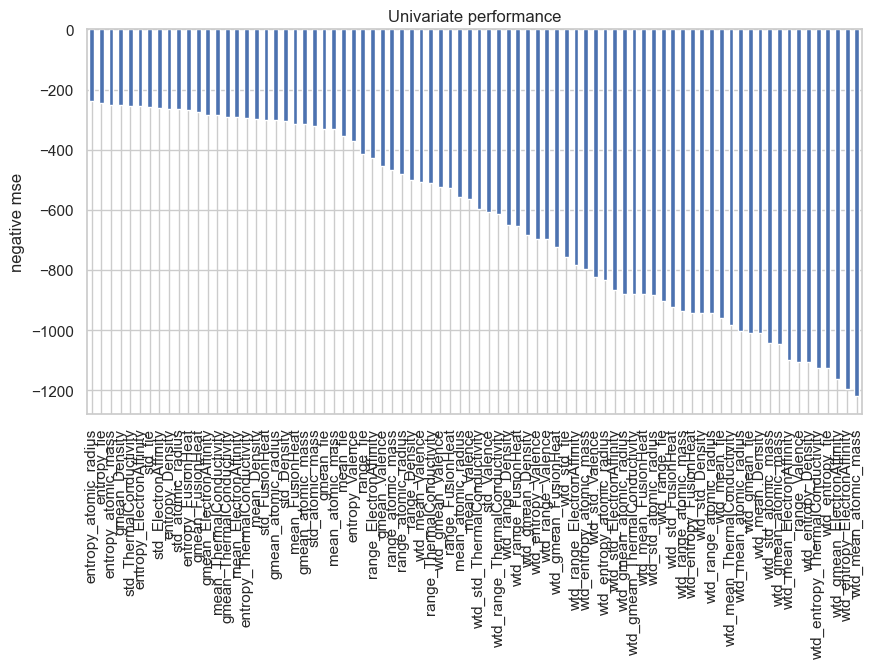

In [8]:
pd.Series(sel.feature_performance_
          ).sort_values(ascending=False
                        ).plot.bar(figsize=(10, 5))

plt.ylabel('negative mse')
plt.title('Univariate performance')

In [9]:
X_train_t = sel.transform(X_train)
X_test_t = sel.transform(X_test)

X_train_t.shape, X_test_t.shape

((16954, 43), (4239, 43))

# Scaling

In [10]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_sc= min_max_scaler.fit_transform(X_train_t)

X_test_sc=min_max_scaler.fit_transform(X_test_t)

In [11]:
scaler = MinMaxScaler()


y_train_sc = scaler.fit_transform(y_train.values.reshape(-1, 1))


y_test_sc = scaler.transform(y_test.values.reshape(-1, 1))

# Baseline model

In [12]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.dummy import DummyRegressor
from sklearn.metrics import (
    mean_absolute_error as mae,
    r2_score as r2,
    mean_absolute_percentage_error as mape,
    mean_squared_error as mse)

In [13]:
def report_metrics(model, X_train_sc, X_test_sc, y_train_sc, y_test_sc, label):
    print(f'Train MAE ({label}):', round(mae(y_train_sc, model.predict(X_train_sc)), 4))
    print(f'Test MAE ({label}) :', round(mae(y_test_sc, model.predict(X_test_sc)), 4), '\n')

    print(f'Train R^2 ({label}):', round(r2(y_train_sc, model.predict(X_train_sc)), 4))
    print(f'Test R^2 ({label}) :', round(r2(y_test_sc, model.predict(X_test_sc)), 4), '\n')

In [14]:
LR_baseline = LinearRegression().fit(X_train_sc, y_train_sc)
report_metrics(LR_baseline, X_train_sc, X_test_sc, y_train_sc, y_test_sc, 'LR_baseline')

Train MAE (LR_baseline): 0.0818
Test MAE (LR_baseline) : 0.091 

Train R^2 (LR_baseline): 0.6639
Test R^2 (LR_baseline) : 0.6219 



# Cross-Validation

In [15]:
list_of_models = [        
        RandomForestRegressor(),
        XGBRegressor(),
        KNeighborsRegressor(),
        LGBMRegressor(),
        SVR()]
        
    

list_of_model_names = [type(x).__name__ for x in list_of_models]
cv_results = pd.DataFrame(
        data=0.0,
        index=list_of_model_names,
        columns=['fit_time', 'score_time','neg_mean_squared_error'])
    
    

    # обучение всех моделей из списка
for model in list_of_models:
        
        cv_result = cross_validate(
            estimator=model,
            X=X_train_sc,
            y=y_train_sc,
            scoring=['neg_mean_squared_error'],
            cv=30,
            n_jobs=-1)
        

        cv_results.loc[type(model).__name__] = list(map(np.mean, cv_result.values()))

print(cv_results)

                        fit_time  score_time  neg_mean_squared_error
RandomForestRegressor  62.660181    0.037244               -0.002729
XGBRegressor            9.884517    0.004317               -0.003016
KNeighborsRegressor     0.007297    0.113291               -0.003747
LGBMRegressor           1.177761    0.007813               -0.003405
SVR                     8.099957    0.439630               -0.007073


In [16]:
list_of_models = [        
        CatBoostRegressor()]
        
    

list_of_model_names = [type(x).__name__ for x in list_of_models]
cv_results = pd.DataFrame(
        data=0.0,
        index=list_of_model_names,
        columns=['fit_time', 'score_time','neg_mean_squared_error'])
    
    

    # обучение всех моделей из списка
for model in list_of_models:
        
        cv_result = cross_validate(
            estimator=model,
            X=X_train_sc,
            y=y_train_sc,
            scoring=['neg_mean_squared_error'],
            cv=7,
            n_jobs=-1)
        

        cv_results.loc[type(model).__name__] = list(map(np.mean, cv_result.values()))

print(cv_results)

                    fit_time  score_time  neg_mean_squared_error
CatBoostRegressor  36.078375    0.058451               -0.003221


# RandomForestRegressor

In [17]:
model_1 = RandomForestRegressor(n_estimators=100, random_state=42)
model_1.fit(X_train_sc, y_train_sc)

# Make predictions on the test set
y_pred_1 = model_1.predict(X_test_sc)

# Evaluate the model's performance
mse = mean_squared_error(y_test_sc, y_pred_1)
mae = mean_absolute_error(y_test_sc, y_pred_1)
r2 = r2_score(y_test_sc, y_pred_1)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_1)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

C:\Users\Margarita\AppData\Local\Temp\ipykernel_2748\1833622144.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_1.fit(X_train_sc, y_train_sc)


Mean Squared Error (MSE): 0.0065572704260888175
Mean Absolute Error (MAE): 0.05380317731845771
R-squared (R2): 0.809733689843422
mape: 9.681069139945162


# XGBRegressor

In [18]:
model_2 = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_2.fit(X_train_sc, y_train_sc)

# Make predictions on the test set
y_pred_2 = model_2.predict(X_test_sc)

# Evaluate the model's performance
mse = mean_squared_error(y_test_sc, y_pred_2)
mae = mean_absolute_error(y_test_sc, y_pred_2)
r2 = r2_score(y_test_sc, y_pred_2)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_2)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

Mean Squared Error (MSE): 0.0062254543794530385
Mean Absolute Error (MAE): 0.05314442982131193
R-squared (R2): 0.8193616921586764
mape: 9.450390573719668


# CatBoostRegressor

In [19]:
model_3 = CatBoostRegressor(iterations=200, learning_rate=0.1, depth=6, random_seed=42)


model_3.fit(X_train_sc, y_train_sc, verbose=50)


y_pred_3 = model_3.predict(X_test_sc)

mse = mean_squared_error(y_test_sc, y_pred_3)
mae = mean_absolute_error(y_test_sc, y_pred_3)
r2 = r2_score(y_test_sc, y_pred_3)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_3)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

0:	learn: 0.1718750	total: 157ms	remaining: 31.3s
50:	learn: 0.0716340	total: 526ms	remaining: 1.53s
100:	learn: 0.0649540	total: 828ms	remaining: 812ms
150:	learn: 0.0609604	total: 1.13s	remaining: 367ms
199:	learn: 0.0580378	total: 1.42s	remaining: 0us
Mean Squared Error (MSE): 0.005936537195264455
Mean Absolute Error (MAE): 0.05330218537299336
R-squared (R2): 0.8277449374733247
mape: 7.076746535235625
